In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
res = pd.read_csv('results_40000.csv', header=None)

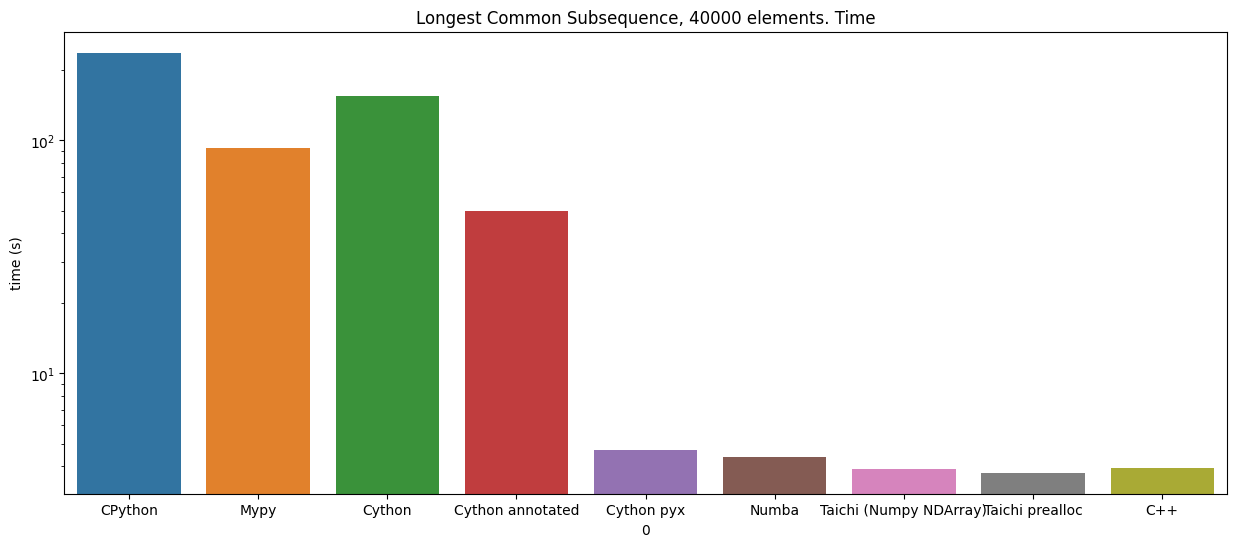

In [3]:
plt.figure(figsize=(15,6))
plt.yscale("log")
ax = sns.barplot(x=res[0], y=res[2])
ax.set(ylabel="time (s)", title="Longest Common Subsequence, 40000 elements. Time")
plt.show()

In [4]:
y = 1./res[2]

In [5]:
speedup = y/y[0]
scpp = speedup[len(speedup)-1]

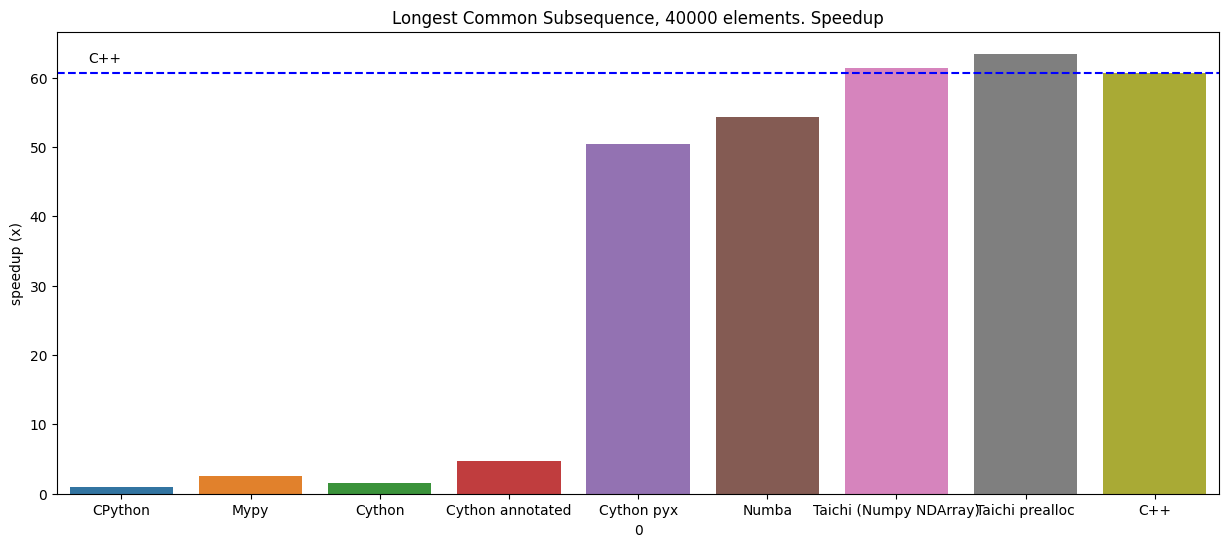

In [6]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=res[0], y=speedup)
ax.set(ylabel="speedup (x)", title="Longest Common Subsequence, 40000 elements. Speedup")
plt.axhline(y =scpp, color = 'b', linestyle = 'dashed', label="C++")
ax.text(0,scpp + 2, "C++",
        ha="right", va="center")
plt.show()

## PyTorch compiler

In [7]:
import torch

In [9]:
def foo(x, y):
    a = torch.sin(x)
    b = torch.cos(y)
    return a + b

In [10]:
#Python 3.11 not supported yet by PyTorch compiler
opt_foo1 = torch.compile(foo)
print(opt_foo1(torch.randn(10, 10), torch.randn(10, 10)))

RuntimeError: Python 3.11+ not yet supported for torch.compile

## FFT

In [1]:
import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [19]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [20]:
def FFT(x:np.ndarray)->np.ndarray:
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])
    

In [67]:
import cmath
import numba
# Utility function for reversing the bits
# of given index x

@numba.jit
def bitReverse(x: int, log2n: int):
    n = 0
    for i in range(log2n):
        n <<= 1
        n |= (x & 1)
        x >>= 1
    return n

# Iterative FFT function to compute the DFT
# of the given coefficient vector

@numba.jit
def fft_iter(a: ti.types.ndarray()):
    n = a.shape[0]
    log2n = 10
    A = np.zeros(1024,dtype=np.complex_)

    # bit reversal of the given array
    for i in range(n):
        rev = bitReverse(i, log2n)
        A[i] = a[rev]

    # j is iota
    J = complex(0, 1)
    for s in range(1, log2n + 1):
        m = 1 << s # 2 power s
        m2 = m >> 1 # m2 = m/2
        w = complex(1, 0)

        # principle root of nth complex
        # root of unity.
        wm = np.exp(J * (np.pi / m2))
        for j in range(m2):
            for k in range(j, n, m):
# A[j:n:m] = A[j:n:m] + w * A[j+m2:n:m]
# A[j+m2:n:m] = A[j:n:m] - w * A[j+m2:n:m]
                # t = twiddle factor
                t = w * A[k + m2]
                u = A[k]

                # similar calculating y[k]
                A[k] = u + t

                # similar calculating y[k+n/2]
                A[k + m2] = u - t
            w *= wm


/var/folders/mn/xl4tpmp572328dmz7478khlc0000gp/T/ipykernel_98759/3761032990.py:6: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit
/var/folders/mn/xl4tpmp572328dmz7478khlc0000gp/T/ipykernel_98759/3761032990.py:18: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit


In [21]:
x = np.random.random(1024)

In [68]:
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit fft_iter(x)
%timeit np.fft.fft(x)

26.7 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
850 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
8.48 µs ± 48.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.93 µs ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
1023 // 2

511